In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('loan_train.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
type(df['due_date'][1])

str

In [5]:
df['due_date']=pd.to_datetime(df['due_date'])

In [6]:
df['effective_date']=pd.to_datetime(df['effective_date'])

In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [8]:
df['day of week']=df['effective_date'].dt.dayofweek

In [9]:
df['day of week']

0      3
1      3
2      3
3      4
4      4
      ..
341    6
342    6
343    0
344    0
345    0
Name: day of week, Length: 346, dtype: int64

In [10]:
df['weekend']=df['day of week'].apply(lambda x : 1 if (x>3) else 0)

In [11]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,day of week,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts()

Gender  loan_status
female  PAIDOFF         45
        COLLECTION       7
male    PAIDOFF        215
        COLLECTION      79
Name: loan_status, dtype: int64

In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [14]:
df['Gender']=df['Gender'].replace(to_replace=['male','female'],value=[0,1])

In [15]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,day of week,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [16]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [17]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [18]:
col=['education']

In [19]:
df=pd.get_dummies(df,columns=col,drop_first=False)

In [20]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,Gender,day of week,weekend,education_Bechalor,education_High School or Below,education_Master or Above,education_college
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,0,3,0,0,1,0,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,1,3,0,1,0,0,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,0,3,0,0,0,0,1
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,1,4,1,0,0,0,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,0,4,1,0,0,0,1


In [21]:
df.drop('education_Master or Above',axis=1,inplace=True)

In [22]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,Gender,day of week,weekend,education_Bechalor,education_High School or Below,education_college
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,0,3,0,0,1,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,1,3,0,1,0,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,0,3,0,0,0,1
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,1,4,1,0,0,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,0,4,1,0,0,1


In [23]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis=1,inplace=True)

In [24]:
df.columns

Index(['loan_status', 'Principal', 'terms', 'effective_date', 'due_date',
       'age', 'Gender', 'day of week', 'weekend', 'education_Bechalor',
       'education_High School or Below', 'education_college'],
      dtype='object')

In [25]:
df.count

<bound method DataFrame.count of     loan_status  Principal  terms effective_date   due_date  age  Gender  \
0       PAIDOFF       1000     30     2016-09-08 2016-10-07   45       0   
1       PAIDOFF       1000     30     2016-09-08 2016-10-07   33       1   
2       PAIDOFF       1000     15     2016-09-08 2016-09-22   27       0   
3       PAIDOFF       1000     30     2016-09-09 2016-10-08   28       1   
4       PAIDOFF       1000     30     2016-09-09 2016-10-08   29       0   
..          ...        ...    ...            ...        ...  ...     ...   
341  COLLECTION        800     15     2016-09-11 2016-09-25   32       0   
342  COLLECTION       1000     30     2016-09-11 2016-10-10   25       0   
343  COLLECTION        800     15     2016-09-12 2016-09-26   39       0   
344  COLLECTION       1000     30     2016-09-12 2016-11-10   28       0   
345  COLLECTION       1000     30     2016-09-12 2016-10-11   26       0   

     day of week  weekend  education_Bechalor  educati

In [26]:
df.drop(['effective_date', 'due_date','day of week'],axis=1,inplace=True)

In [27]:
df.head()

,loan_status,Principal,terms,age,Gender,weekend,education_Bechalor,education_High School or Below,education_college
0,PAIDOFF,1000,30,45,0,0,0,1,0
1,PAIDOFF,1000,30,33,1,0,1,0,0
2,PAIDOFF,1000,15,27,0,0,0,0,1
3,PAIDOFF,1000,30,28,1,1,0,0,1
4,PAIDOFF,1000,30,29,0,1,0,0,1


In [28]:
df.columns

Index(['loan_status', 'Principal', 'terms', 'age', 'Gender', 'weekend',
       'education_Bechalor', 'education_High School or Below',
       'education_college'],
      dtype='object')

In [29]:
X=df.drop(['loan_status'],axis=1)

In [30]:
y=df['loan_status']

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
ssd=StandardScaler()

In [33]:
X=ssd.fit_transform(X)

In [243]:
X

array([[ 0.51578458,  0.92071769,  2.33152555, ..., -0.38170062,
         1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, ...,  2.61985426,
        -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, ..., -0.38170062,
        -0.87997669,  1.14984679],
       ...,
       [-1.31458942, -0.95911111,  1.33661351, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.38170062,
        -0.87997669,  1.14984679]])

In [35]:
y

0         PAIDOFF
1         PAIDOFF
2         PAIDOFF
3         PAIDOFF
4         PAIDOFF
          ...    
341    COLLECTION
342    COLLECTION
343    COLLECTION
344    COLLECTION
345    COLLECTION
Name: loan_status, Length: 346, dtype: object

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
#K Neighbour Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
#Measuring accuracy
Ks=30
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros(Ks-1)

for n in range(1,Ks):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,pred)
    
    std_acc[n-1]=np.std(pred==y_test)/np.sqrt(pred.shape[0])

In [42]:
#Measuring error rate

errorrate=[]

for i in range(1,30):
    kNN=KNeighborsClassifier(n_neighbors=i)
    kNN.fit(X_train,y_train)
    p=kNN.predict(X_test)
    errorrate.append(np.mean(p!=y_test))

Text(20.875, 0.5, 'Error')

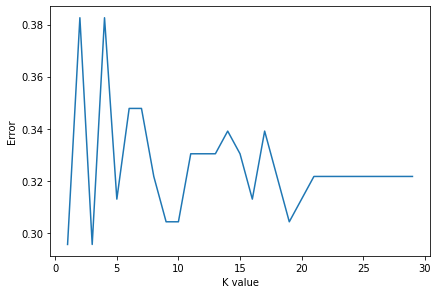

In [236]:
plt.plot(range(1,30),errorrate)
plt.tight_layout()
plt.xlabel("K value")
plt.ylabel("Error")

In [44]:
print("Maximum accuracy score is ",mean_acc.max(), "and highest k value is", mean_acc.argmax()+1 )

Maximum accuracy score is  0.7043478260869566 and highest k value is 1


In [240]:
mean_acc[2]

0.7043478260869566

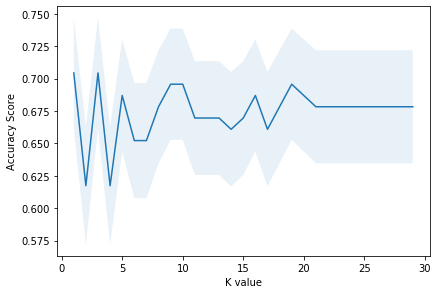

In [235]:
plt.plot(range(1,Ks),mean_acc)
plt.fill_between(range(1,Ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.1)
plt.tight_layout()
plt.xlabel("K value")
plt.ylabel('Accuracy Score')
plt.show()

In [101]:
Knn=KNeighborsClassifier(n_neighbors=3)
Knn.fit(X_test,y_test)
predictk=Knn.predict(X_test)

In [102]:
from sklearn.metrics import jaccard_similarity_score,classification_report,f1_score,log_loss

In [103]:

print(classification_report(y_test,predictk))
print("\n")

print("Jaccard Similarity score for KNeighbor classifier is" ,jaccard_similarity_score(y_test,predictk))
print("\n")
print("F1 score for KNeighbor Classifier is" ,f1_score(y_test,predictk,average='weighted'))

              precision    recall  f1-score   support

  COLLECTION       0.82      0.54      0.65        26
     PAIDOFF       0.88      0.97      0.92        89

    accuracy                           0.87       115
   macro avg       0.85      0.75      0.79       115
weighted avg       0.87      0.87      0.86       115



Jaccard Similarity score for KNeighbor classifier is 0.8695652173913043


F1 score for KNeighbor Classifier is 0.8590538706520386


D:\anacondaa\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [50]:
#Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dt=DecisionTreeClassifier()

In [53]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [54]:
predictdt=dt.predict(X_test)

In [55]:
print(classification_report(y_test,predictdt))
print("\n")

print("Jaccard Similarity score for Decisin Tree is" ,jaccard_similarity_score(y_test,predictdt))
print("\n")
print("F1 score for Decision Tree is" ,f1_score(y_test,predictdt,average='weighted'))

              precision    recall  f1-score   support

  COLLECTION       0.29      0.38      0.33        26
     PAIDOFF       0.80      0.72      0.76        89

    accuracy                           0.64       115
   macro avg       0.54      0.55      0.54       115
weighted avg       0.68      0.64      0.66       115



Jaccard Similarity score for Decisin Tree is 0.6434782608695652


F1 score for Decision Tree is 0.6602858625008962


D:\anacondaa\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [56]:
#Support Vector Machine

In [57]:
from sklearn.svm import SVC

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
paramgrid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,10]}

In [60]:
grid=GridSearchCV(SVC(),paramgrid,verbose=3)

In [61]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.745, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.739, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.739, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.739, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.739, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.745, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.739, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.745, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.739, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.739, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.739, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.739, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.745, total=   0.0s
[CV] 

[CV] ................... C=10, gamma=0.001, score=0.739, total=   0.0s
[CV] C=10, gamma=10 ..................................................
[CV] ...................... C=10, gamma=10, score=0.638, total=   0.0s
[CV] C=10, gamma=10 ..................................................
[CV] ...................... C=10, gamma=10, score=0.783, total=   0.0s
[CV] C=10, gamma=10 ..................................................
[CV] ...................... C=10, gamma=10, score=0.696, total=   0.0s
[CV] C=10, gamma=10 ..................................................
[CV] ...................... C=10, gamma=10, score=0.674, total=   0.0s
[CV] C=10, gamma=10 ..................................................
[CV] ...................... C=10, gamma=10, score=0.783, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.723, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    2.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [62]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [63]:
svm=SVC(C=1,gamma=0.1)

In [64]:
svm.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [65]:
predictsvc=svm.predict(X_test)

In [66]:
print(classification_report(y_test,predictsvc))
print("\n")

print("Jaccard Similarity score for SVM is" ,jaccard_similarity_score(y_test,predictsvc))
print("\n")
print("F1 score for SVM is" ,f1_score(y_test,predictsvc,average='weighted'))

              precision    recall  f1-score   support

  COLLECTION       0.25      0.19      0.22        26
     PAIDOFF       0.78      0.83      0.80        89

    accuracy                           0.69       115
   macro avg       0.51      0.51      0.51       115
weighted avg       0.66      0.69      0.67       115



Jaccard Similarity score for SVM is 0.6869565217391305


F1 score for SVM is 0.6716446124763705


D:\anacondaa\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [67]:
#Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
lr=LogisticRegression(C=1,solver='liblinear')

In [70]:
lr.fit(X_test,y_test)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
predictlr=lr.predict(X_test)

In [72]:
print(classification_report(y_test,predictlr))
print("\n")

print("Jaccard Similarity score for Logistic Regression is" ,jaccard_similarity_score(y_test,predictlr))
print("\n")
print("F1 score for Logistic Regression is" ,f1_score(y_test,predictlr,average='weighted'))
print("\n")


              precision    recall  f1-score   support

  COLLECTION       0.50      0.23      0.32        26
     PAIDOFF       0.81      0.93      0.86        89

    accuracy                           0.77       115
   macro avg       0.65      0.58      0.59       115
weighted avg       0.74      0.77      0.74       115



Jaccard Similarity score for Logistic Regression is 0.7739130434782608


F1 score for Logistic Regression is 0.7405081998474446




D:\anacondaa\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [73]:
predictlrprob=lr.predict_proba(X_test)


In [241]:
print("Log loss for Logistic regression is", log_loss(y_test,predictlrprob))

Log loss for Logistic regression is 0.41100989637503016


In [242]:
#Test DataSet

In [75]:
test_df=pd.read_csv('loan_test.csv')

In [76]:
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [77]:
test_df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [78]:
test_df['effective_date']=pd.to_datetime(test_df['effective_date'])

In [79]:
test_df['due_date']=pd.to_datetime(test_df['due_date'])

In [80]:
test_df['day of week']=test_df['effective_date'].dt.dayofweek

In [81]:
test_df['weekend']=test_df['day of week'].apply(lambda x : 1 if x>=4 else 0)

test_df.head()

In [83]:
test_df.drop(['effective_date','due_date','day of week'],axis=1,inplace=True)

In [84]:
test_df.head()

,loan_status,Principal,terms,age,education,Gender,weekend
0,PAIDOFF,1000,30,50,Bechalor,female,0
1,PAIDOFF,300,7,35,Master or Above,male,1
2,PAIDOFF,1000,30,43,High School or Below,female,1
3,PAIDOFF,1000,30,26,college,male,1
4,PAIDOFF,800,15,29,Bechalor,male,1


In [85]:
test_df['Gender']=test_df['Gender'].replace(to_replace=['male','female'],value=[0,1])

In [87]:
test_df.head()

,loan_status,Principal,terms,age,education,Gender,weekend
0,PAIDOFF,1000,30,50,Bechalor,1,0
1,PAIDOFF,300,7,35,Master or Above,0,1
2,PAIDOFF,1000,30,43,High School or Below,1,1
3,PAIDOFF,1000,30,26,college,0,1
4,PAIDOFF,800,15,29,Bechalor,0,1


In [88]:
col=['education']

In [89]:
test_df=pd.get_dummies(test_df,columns=col)

In [90]:
test_df.head()

,loan_status,Principal,terms,age,Gender,weekend,education_Bechalor,education_High School or Below,education_Master or Above,education_college
0,PAIDOFF,1000,30,50,1,0,1,0,0,0
1,PAIDOFF,300,7,35,0,1,0,0,1,0
2,PAIDOFF,1000,30,43,1,1,0,1,0,0
3,PAIDOFF,1000,30,26,0,1,0,0,0,1
4,PAIDOFF,800,15,29,0,1,1,0,0,0


In [92]:
test_df.drop(['education_Master or Above'],axis=1,inplace=True)

In [93]:
test_df.head()

,loan_status,Principal,terms,age,Gender,weekend,education_Bechalor,education_High School or Below,education_college
0,PAIDOFF,1000,30,50,1,0,1,0,0
1,PAIDOFF,300,7,35,0,1,0,0,0
2,PAIDOFF,1000,30,43,1,1,0,1,0
3,PAIDOFF,1000,30,26,0,1,0,0,1
4,PAIDOFF,800,15,29,0,1,1,0,0


In [94]:
X_Test=test_df.drop(['loan_status'],axis=1)

In [96]:
y_Test=test_df['loan_status']

In [98]:
X_Test=ssd.fit_transform(X_Test)

In [99]:
X_Test

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677],
       [-1.24479571, -0.78854628,  0.19650211, -0.50578054,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588, -0.78854628, -1.31937134, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [ 0.49362588,  0.92844966,  0.02807173, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677],
       [-0.66532184, -0.78854628

In [100]:
#K Means Clustering 

In [104]:
predict_ktest=Knn.predict(X_Test)

In [105]:
print(classification_report(y_Test,predict_ktest))

              precision    recall  f1-score   support

  COLLECTION       0.55      0.43      0.48        14
     PAIDOFF       0.81      0.88      0.84        40

    accuracy                           0.76        54
   macro avg       0.68      0.65      0.66        54
weighted avg       0.74      0.76      0.75        54



In [120]:
JaccardKNN=jaccard_similarity_score(y_Test,predict_ktest)

D:\anacondaa\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [121]:
JaccardKNN

0.7592592592592593

In [122]:
F1ScoreKNN=f1_score(y_Test,predict_ktest,average='weighted')

In [123]:
F1ScoreKNN

0.7491655510932619

In [124]:
#Decision Tree

In [125]:
predictDT=dt.predict(X_Test)

In [126]:
JaccardDT=jaccard_similarity_score(y_Test,predictDT)

D:\anacondaa\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [127]:
JaccardDT

0.6851851851851852

In [128]:
F1ScoreDT=f1_score(y_Test,predictDT,average='weighted')

In [129]:
F1ScoreDT

0.6812985825331505

In [130]:
#Support Vector Machine

In [131]:
predictSVM=svm.predict(X_Test)

In [132]:
JaccardSVM=jaccard_similarity_score(y_Test,predictSVM)

D:\anacondaa\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [133]:
JaccardSVM

0.7592592592592593

In [135]:
F1ScoreSVM=f1_score(y_Test,predictSVM,average='weighted')

In [136]:
F1ScoreSVM

0.7401723974614001

In [137]:
#Logistic Regression

In [140]:
predictLR=lr.predict(X_Test)

In [141]:
JaccardLR=jaccard_similarity_score(y_Test,predictLR)

D:\anacondaa\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [142]:
JaccardLR

0.7222222222222222

In [144]:
F1ScoreLR=f1_score(y_Test,predictLR,average='weighted')

In [145]:
F1ScoreLR

0.6491417079652374

In [146]:
predictLRprob=lr.predict_proba(X_Test)

In [147]:
LogLossLR=log_loss(y_Test,predictLRprob)

In [149]:
LogLossLR

0.5393990037427481

In [150]:
data = {'Name':['Tom', 'Jack', 'nick', 'juli'], 'marks':[99, 98, 95, 90]} 
  
# Creates pandas DataFrame. 
df = pd.DataFrame(data, index =['rank1', 'rank2', 'rank3', 'rank4']) 
  
# print the data 
df 

,Name,marks
rank1,Tom,99
rank2,Jack,98
rank3,nick,95
rank4,juli,90


In [214]:
data={'Jaccard':[JaccardKNN,JaccardDT,JaccardSVM,JaccardLR],'F1-Score':[F1ScoreKNN,F1ScoreDT,F1ScoreSVM,F1ScoreLR],'Log Loss':[np.nan,np.nan,np.nan,LogLossLR]}

In [228]:
report=pd.DataFrame(data,index=['KNN','Decision Tree','SVM','Logistic'])

In [229]:
report=report.reset_index()

In [230]:
report=report.rename(columns={'index':'Algorithm'})

In [225]:
#report.index.name='Algorithms'

In [233]:
report

,Algorithm,Jaccard,F1-Score,Log Loss
0,KNN,0.759259,0.749166,NaN
1,Decision Tree,0.685185,0.681299,NaN
2,SVM,0.759259,0.740172,NaN
3,Logistic,0.722222,0.649142,0.539399
